In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras import backend as K
import numpy as np

Using TensorFlow backend.


In [2]:
# parameters
batch_size = 128
num_classes = 10
epochs = 16
img_rows, img_cols = 28, 28

In [26]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_test_values = y_test

In [28]:
print (x_train.shape)
print (x_test.shape)
print(x_train.shape[0])
# reshape data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

##After Reshape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
60000
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [29]:
# convert to 0-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
print("Before Conversion:", y_train[1:10,])
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("After Conversion:", y_train[1:10,])

Before Conversion: [0 4 1 9 2 1 3 1 4]
After Conversion: [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


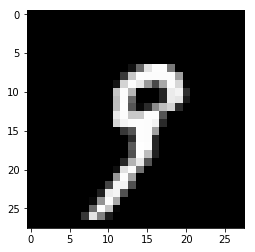

In [7]:
# display a training image
plt.imshow(x_train[19,:,:,0], cmap='gray')
print(y_train[19])

In [8]:
# define model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
# print model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
model_checkpoint = keras.callbacks.ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5')
csv_logger = keras.callbacks.CSVLogger('training.log')
tb_callback = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

In [12]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks = [model_checkpoint, csv_logger, tb_callback],
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 216s - loss: 0.3348 - acc: 0.8984 - val_loss: 0.0766 - val_acc: 0.9760
Epoch 2/16
60000/60000 [==============================] - 219s - loss: 0.1136 - acc: 0.9672 - val_loss: 0.0510 - val_acc: 0.9841
Epoch 3/16
60000/60000 [==============================] - 217s - loss: 0.0840 - acc: 0.9746 - val_loss: 0.0452 - val_acc: 0.9856
Epoch 4/16
60000/60000 [==============================] - 218s - loss: 0.0718 - acc: 0.9789 - val_loss: 0.0412 - val_acc: 0.9863
Epoch 5/16
60000/60000 [==============================] - 221s - loss: 0.0628 - acc: 0.9804 - val_loss: 0.0346 - val_acc: 0.9881
Epoch 6/16
60000/60000 [==============================] - 219s - loss: 0.0553 - acc: 0.9838 - val_loss: 0.0326 - val_acc: 0.9890
Epoch 7/16
60000/60000 [==============================] - 223s - loss: 0.0508 - acc: 0.9848 - val_loss: 0.0322 - val_acc: 0.9894
Epoch 8/16
60000/60000 [=======================

16
16
[0.076561994872987274, 0.050950824962370099, 0.045197324736695736, 0.041170236875303093, 0.034553348570596429, 0.032649273520987482, 0.032247618221584708, 0.030206046436284668, 0.027619756390154362, 0.028588619418232701, 0.028236762908659875, 0.029391760002938101, 0.031101430495746898, 0.029682816780172289, 0.028152254928660112, 0.027263934216136113]


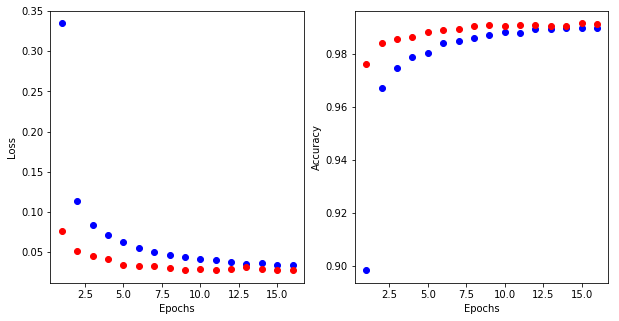

In [16]:
# Graphing Loss on the left and Accuracy on the right
history_dict = history.history

epochs_list = range(1, epochs+1)

plt.rcParams["figure.figsize"] = [10,5]
plt.subplot(121)

loss_values = history_dict['loss']
print(len(loss_values))
print(len(epochs_list))
val_loss_values = history_dict['val_loss']
print(val_loss_values)
plt.plot(epochs_list, loss_values, 'bo')
plt.plot(epochs_list, val_loss_values, 'ro')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs_list, acc_values, 'bo')
plt.plot(epochs_list, val_acc_values, 'ro')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [17]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

#Serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

#load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

#evaluate loaded model on test data
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%"% (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
acc: 99.11%


In [30]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)
print(predicted_classes)
print(y_test)
# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test_values)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test_values)[0]

10000/10000 [==============================] - 13s    
[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]


[   0    1    2 ..., 9997 9998 9999]
[ 320  321  340  359  445  582  659  684  717  947 1014 1039 1112 1182 1226
 1232 1242 1247 1260 1319 1393 1414 1527 1530 1549 1621 1709 1790 1878 1901
 2035 2070 2098 2118 2129 2130 2135 2293 2387 2406 2414 2454 2462 2488 2597
 2654 2896 2921 2939 3030 3060 3073 3422 3503 3520 3558 3559 3767 3778 3808
 3941 4078 4176 4238 4248 4256 4740 4761 4807 4823 5246 5331 5887 5955 6091
 6166 6173 6576 6597 6625 6651 6783 8408 9009 9015 9664 9729 9770 9982]


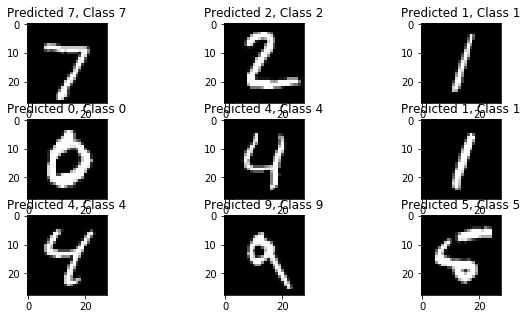

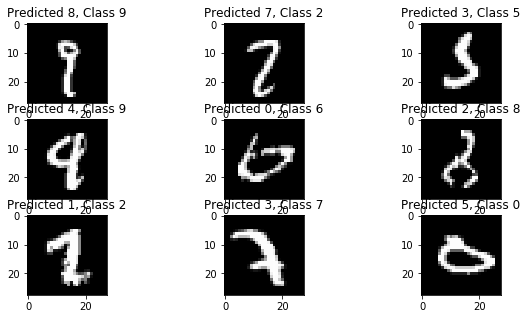

In [31]:
print(correct_indices)
print(incorrect_indices)
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))